# 3.4 Change of basis

Change of basis is a method that enables us to represent linear transformations in a different form. This change of representation has various applications, including simplifying computations in certain situations. In this section, we will introduce the concept of change of basis and explore its properties.

## Transition Matrices


Let $H$ be a subspace of $\mathbb{R}^n$ with basis $B = \{\vec{b}_1, \dots, \vec{b}_p\}$. We know that every vector $x\in H$ can be written uniquely as a linear combination of these basis vectors: 

$$
\vec{x} = c_1 \vec{b}_1 + \dots + c_p\vec{b}_p = \begin{bmatrix} \vec{b}_1 & \vec{b}_2 & \dots & \vec{b}_p \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_p \end{bmatrix} \quad (*)
$$ 

The coefficients $c_1, c_2, \dots c_p$ are called the coordinates of $\vec{x}$ with respect to basis $B$. We  store the coordinates in a vector that it denoted by $[\vec{x}]_B$:


$$
[\vec{x}]_B = \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_p \end{bmatrix}
$$

If we store the basis vectors in a matrix $P_B = \begin{bmatrix} \vec{b}_1 & \vec{b}_2 & \dots & \vec{b}_p \end{bmatrix}$, then we can rewrite $(*)$ as

$$ \vec{x} = P_B [\vec{x}_B]
$$

We think of $P_B$ as a transformation that takes in the coordinates of $\vec{x}$ with respect to $B$ and returns $\vec{x}$. Note that $P_B$ is invirtible since its columns are linearly independent. In a simmilar way, we can think of $(P_B)^{-1}$ as a transformation takes in a vector and returns its coordinate with respect to $B$. In other words, 

$$
[\vec{x}]_B = (P_B)^{-1} \vec{x} 
$$


Now suppose that $G = \{\vec{g}_1, \dots, \vec{g}_p\}$ is another basis for $H$. We are interested in finding coordinates of $\vec{x}$ with respect to $G$ from $[\vec{x}]_B$ directly. More peciesely, we are looking for a linear map $T: \mathbb{R}^p\to \mathbb{R}^p$ defined by $T([\vec{x}]_B) = [\vec{x}]_G$. The following computation shows that the matrix representation of $T$ should be $(P_G)^{-1} P_B$:


$$
[\vec{x}]_G = (P_G)^{-1} \vec{x} = (P_G)^{-1}P_B [\vec{x}_B].
$$



The matrix $(P_G)^{-1} P_B$ is called the __transition matrix__ and is denoted by $P_{B\to G}$. Note that transition matrices are invirtible by definition.


__Theorem 1__ 

The columns of the transition matrix $P_{B\to G}$ are the coordinates of each of the basis vectors in $B$ with respect to the basis $G$:

$$
P_{B\to G} = \left[ [\vec{b_1}]_G,\, [\vec{b_2}]_G,\, 
\dots,\, [\vec{b_p}]_G\right].
$$


__Example 1__ 

Consider two bases $B = \left\{ \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix}   \right\}$ and $G = \left\{ \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \begin{bmatrix} 2 \\ 1 \end{bmatrix}   \right\}$ for $\mathbb{R}^2$, and let $\vec{x} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$.

1. Find $[\vec{x}]_B.$ 

2. Find $[\vec{x}]_G.$

3. Compute the transition matrix $P_{B\to G}$

4. Verify that it indeed converts $\begin{bmatrix} 2 \\ 4 \end{bmatrix}_{B}$  to $\begin{bmatrix} 2 \\ 4 \end{bmatrix}_{G}.$ 

__Solution__


In [1]:
# (1) Finding [x]_B

import numpy as np

# basis B: each row is a basis vector
B = np.array([[1,0], [0,1]]) 

# matrix of B: each column is a basis vector
P_B = np.transpose(B)

print(P_B)

#vector x
x = np.array([[2],[4]])


# compute the inverse of a matrix
def inverse(matrix):
    a, b = matrix[0]
    c, d = matrix[1]
    
    det = a * d - b * c

    if det == 0:
        print(matrix, "is not invertible")
    else:
        D = 1 / det    
        inverse = np.zeros((2, 2))
        inverse[0, 0] = D * d
        inverse[0, 1] = -D * b
        inverse[1, 0] = -D * c
        inverse[1, 1] = D * a
        return(inverse)

#computing [x]_B

x_B = inverse(P_B) @ x
print("coordinate of x with respect to B = \n", x_B)

[[1 0]
 [0 1]]
coordinate of x with respect to B = 
 [[2.]
 [4.]]


In [2]:
# (2)  finding [x]_G


#basis G
G = np.array([[1,2], [2,1]])

#matrix of G: P_G

P_G = np.transpose(G)

#computing [x]_G
x_G = inverse(P_G) @ x
print("coordinate of x with respect to G = \n", x_G)

coordinate of x with respect to G = 
 [[2.]
 [0.]]


In [3]:
# (3) finding the transition matix

B2G_transition = inverse(P_G) @ P_B
print('the transition matrix P_{B to G} = \n\n', B2G_transition)



the transition matrix P_{B to G} = 

 [[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]]


In [4]:
# (4)

B2G_transition @ x_B

array([[2.],
       [0.]])

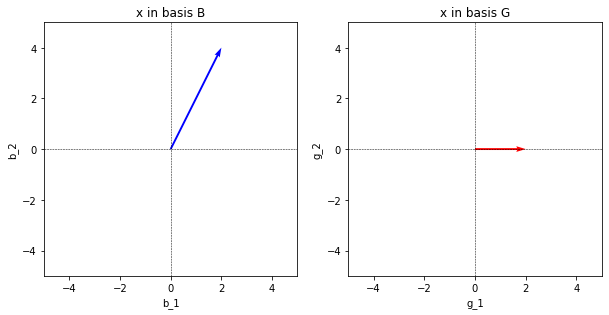

In [5]:
# Plot the coordinates in two separate plots

from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
ax1.quiver(0, 0, x_B[0], x_B[1], angles='xy', scale_units='xy', scale=1, color='blue')
ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.set_aspect('equal')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax1.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
ax1.set_xlabel('b_1')
ax1.set_ylabel('b_2')
ax1.set_title('x in basis B')
plt.grid()

    
ax2.quiver(0, 0, x_G[0], x_G[1], angles='xy', scale_units='xy', scale=1, color='red')
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.set_aspect('equal')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
ax2.set_xlabel('g_1')
ax2.set_ylabel('g_2')
ax2.set_title('x in basis G')
plt.grid()
   
    
#plt.tight_layout()
plt.show()




## The matrix representation of linear transformation

Now, let's examine how the matrix representation of a linear map $T: \mathbb{R}^n\to \mathbb{R}^m$ changes when we change the bases in the domain and codomain.

Let $B_1 = \{\vec{b}_1, \dots, \vec{b}_n\}$ and $B_2 = \{\vec{b}'_1, \dots, \vec{b}'_n\}$ be two bases for $\mathbb{R}^n$, and $G_1 = \{\vec{g}_1, \dots, \vec{g}_m\}$ and $G_2 = \{\vec{g}'_1, \dots, \vec{g}'_m\}$ be two bases for $\mathbb{R}^m$. To avoid confusion, we use $(\mathbb{R}^n, B_1)$ to explicitly indicate the basis considered for $\mathbb{R}^n$.

We denote the matrix representation of $T: (\mathbb{R}^n, B_1) \to (\mathbb{R}^m, G_1)$ by $A_1$, and the matrix representation of $T: (\mathbb{R}^n, B_2) \to (\mathbb{R}^m, G_2)$ by $A_2$. The next theorem shows how $A_1$ and $A_2$ are related by the following equation:


__Theorem 3__ 

$$
A_2 = P_{G_1\to G_2} A_1 P_{B_2\to B_1}
$$

Here, $P_{G_1\to G_2}$ is the transition matrix from the basis $G_1$ to $G_2$ in $\mathbb{R}^m$, and $P_{B_2\to B_1}$ represents the transition matrix from the basis $B_2$ to $B_1$ in $\mathbb{R}^n$.


__Example 3__

Consider a linear mapping $T : \mathbb{R}^3 \to \mathbb{R}^4$ whose standard matrix representation is

$$
A_1 = \begin{bmatrix} 1 & 2 & 0 \\ -1 & 1 & 3 \\ 3 & 7 & 1 \\ -1 & 2 & 4 \end{bmatrix}
$$

Let 

$$
B_2 = \left\{\ \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix}\ \right\}
$$

be a basis for $\mathbb{R}^3$ and 

$$G_2 = \left\{\ \begin{bmatrix} 1 \\ 1 \\ 1 \\ 0\end{bmatrix}, \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} \ \right\}
$$

be a basis for $\mathbb{R}^4$. Find the matrix representation of $T: (\mathbb{R}^3, B) \to (\mathbb{R}^4, G)$

__Solution__:

Let $B_1$ and $G_1$ denote the standard basis of $\mathbb{R}^3$ and $\mathbb{R}^4$ respectively. To compute the transition matrices, we need to find the inverses of $3\times 3$ matrices. To simplify the process, we can use the `np.linalg.inv` function, which is an inner function in the NumPy linear algebra submodule. It provides a convenient way to calculate matrix inverses without explicitly performing row reduction.

In [6]:
# Standard basis in R^3: each row is a basis vector
B1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) 
P_B1 = np.transpose(B1)

#Standard basis in R^4
G1 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]) 
P_G1 = np.transpose(G1)


#Second basis in R^3
B2 = np.array([[1,1,0], [0,1,1], [1,0,1]]) 
P_B2 = np.transpose(B2)

#Second basis in R^4
G2 = np.array([[1,1,0,0], [1,0,1,0], [0,1,1,0], [1,0,0,1]])
P_G2 = np.transpose(G2)


# matrix representation of T with rspect to B1 and G1
A_1 = np.array([[1,2,0], [-1,1,3], [3,7, 1], [-1,2,4]])

#create transtion matrix from B2 to B1
B21 = np.linalg.inv(P_B1) @ P_B2 

#create the transtion matrix from G1 to G2
G12 = np.linalg.inv(P_G2) @ P_G1 

#computes the representation with respect to new bases
A_2 = G12 @ A_1 @ B21
A_2

array([[-4., -4., -2.],
       [ 6.,  0.,  0.],
       [ 4.,  8.,  4.],
       [ 1.,  6.,  3.]])

One of the important tasks in linear algebra is to find a basis that simplifies the matrix representation of a linear map, and thus, facilitate computations. We will discuss this more in the next section. Here we give an example how the change of basis helps to find a simplified representation of a linear transformation. 


__Example 4__ 

Let $T: \mathbb{R}^2 \to \mathbb{R}^2$ and $A = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$ be standard  matrix representation of $T$. Define a new basis 

$$G = \left\{ \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ -1 \end{bmatrix} \right\}$$ 

and compute the matrix representation of $T : (\mathbb{R}^2, G)\to (\mathbb{R}^2, G)$.


__Solution:__

Let $B$ denote the standard basis of $\mathbb{R}^2$, and $D$ represent the new matrix representation of $T$. We have:

$$
D = P_{B\to G}\ A \ P_{G\to B}
$$

By computing $D$, we can see that it is actually a diagonal matrix. This change of basis, known as _diagonalization_, will be discussed further in next sections.

In [7]:
# Standard basis in R^2
B = np.array([[1,0], [0,1]]) 
P_B = np.transpose(B)

#Second basis in R^2
G = np.array([[1,1], [1,-1]])
P_G = np.transpose(G)

# standard matrix representation of T
A = np.array([[2,1], [1,2]])

#create transtion matrix from B2 to B1
P_BtoG = np.linalg.inv(P_G) @ P_B 

#create the transtion matrix from G1 to G2
P_GtoB = np.linalg.inv(P_B) @ P_G 

#computes the representation with respect to new bases
D = P_BtoG @ A @ P_GtoB
D

array([[3., 0.],
       [0., 1.]])

## Similar matrices

In Example 3 and 4 we saw that a linear map can have different matrix representation; these matrices are related by an equation defined in Theorem 3. Now we want to discuss the opposit secnario: given two matrices, how can we check if they are representing the same linear map? 

We say that two $n\times m$ matrices $A_1$ and $A_2$ are __equivalent__ if there is an $n\times n$ invirtible matrix $P$ and $m\times m$ invirtible matrix $Q$ such that 

$$
A_1 = P^{-1} A_2 Q
$$

Equivalent matrices represent the same linear map under two different choices of a pair of bases of $\mathbb{R^n}$ and $\mathbb{R^m}$, with P and Q being the transition matrices in $\mathbb{R^n}$ and $\mathbb{R^m}$ respectively.


For example, $A_1$ and $A_2$ in Example 3 are equivalent. Because

$$
A_2 = P_{G_1\to G_2} A_1 P_{B_2\to B_1}
$$

Here $P =  P_{G_2\to G_1}$ and $Q = P_{B_2\to B_1}$. If $P$ and $Q$ happen to be the same matrices, then we call $A_1$ and $A_2$ __similar__. More perciesely, two $n\times n$ matrices $A_1$ and $A_2$ are similar if there exist an invertible matrix $P$ such that 

$$
A = P^{-1}AP
$$

For example, $A$ and $D$ in Example 4 are similar because

$$
D = P_{B\to G}\ A \ P_{G\to B}
$$

and clearly $P_{B\to G}$ is the inverse of P_{G\to B}. Indeed one can easily verify that: 

In [8]:
P_BtoG @ P_GtoB

array([[1., 0.],
       [0., 1.]])

__Excercise__

1. Let 

$$
P = \begin{bmatrix} 1 & 2 & -1 \\ -3 & -5 & 0 \\ 4 & 6 & 1 \end{bmatrix}
$$

and $B$ be a basis of $\mathbb{R}^3$ containing 

$$
\vec{b_1} = \begin{bmatrix} -2 \\ 2 \\ 3 \end{bmatrix}, \vec{b_2}\begin{bmatrix} -8 \\ 5 \\ 2 \end{bmatrix}, \vec{b_3} = \begin{bmatrix} -7 \\ 2 \\ 6 \end{bmatrix}.
$$

Find a basis $G = \{\vec{g_1}, \vec{g_2}, \vec{g_3}\}$ such that $P$ becomes the transition of basis from $G$ to $B$.


2. Consider the following bases of $\mathbb{R}^2$: 

$$
B = \left\lbrace \begin{bmatrix}
3 \\ 2
\end{bmatrix}, \begin{bmatrix}
1 \\ 1
\end{bmatrix}\right\rbrace \quad \text {and} \quad G = \left\lbrace \begin{bmatrix}
-2 \\ -5
\end{bmatrix}, \begin{bmatrix}
1 \\ 2
\end{bmatrix}\right\rbrace
$$ 

   a. For $\vec{x} = \begin{bmatrix} 3 \\ -1 \end{bmatrix}$  compute $[\vec{x}]_{B}.$
   
   b. Let $A = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}$ be the standard matrix representation of $T: \mathbb{R}^2 \to \mathbb{R}^2$. Find the matrix representation for $T: (\mathbb{R}^2,B) \to (\mathbb{R}^2, G)$.
   
   
